In [1]:
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
print(dataset["full"][0])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


Loaded dataset from Internet

In [2]:
dataset.shape #shape of the dataset

{'full': (701528, 10)}

In [3]:
dataset_meta = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
print(dataset_meta[0])


{'main_category': 'All Beauty', 'title': 'Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)', 'average_rating': 4.8, 'rating_number': 10, 'features': [], 'description': [], 'price': 'None', 'images': {'hi_res': [None, 'https://m.media-amazon.com/images/I/71i77AuI9xL._SL1500_.jpg'], 'large': ['https://m.media-amazon.com/images/I/41qfjSfqNyL.jpg', 'https://m.media-amazon.com/images/I/41w2yznfuZL.jpg'], 'thumb': ['https://m.media-amazon.com/images/I/41qfjSfqNyL._SS40_.jpg', 'https://m.media-amazon.com/images/I/41w2yznfuZL._SS40_.jpg'], 'variant': ['MAIN', 'PT01']}, 'videos': {'title': [], 'url': [], 'user_id': []}, 'store': 'Howard Products', 'categories': [], 'details': '{"Package Dimensions": "7.1 x 5.5 x 3 inches; 2.38 Pounds", "UPC": "617390882781"}', 'parent_asin': 'B01CUPMQZE', 'bought_together': None, 'subtitle': None, 'author': None}


Reviews dataset loaded

In [4]:
dataset_meta.shape #shape of the dataset

(112590, 16)

In [5]:
import pandas as pd

# Convert datasets to pandas DataFrames
df_reviews = pd.DataFrame(dataset["full"])
df_meta = pd.DataFrame(dataset_meta)


DataFrame created for both the dataset.

In [6]:
# Check column names in both DataFrames
print("Columns in df_reviews:", df_reviews.columns)
print("Columns in df_meta:", df_meta.columns)

Columns in df_reviews: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
Columns in df_meta: Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')


In [7]:
df_meta_renamed = df_meta.rename(columns={'parent_asin': 'asin'}) # rename the columns for the analysis

In [8]:
df_combined = pd.merge(df_reviews, df_meta_renamed, on='asin', how='inner') 

Merged the both datasets on the asin named column which is common on both dataset

In [9]:
print(df_combined.shape) #shape of the combined data

(640340, 25)


In [10]:
# Dropping redundant columns
df_combined_cleaned = df_combined.drop(columns=['parent_asin', 'title_x', 'images_x'])


In [11]:
df_combined_cleaned = df_combined_cleaned.drop(columns=['bought_together', 'author'])

In [12]:
df_combined = df_combined_cleaned.copy() # Create copy of the data 

In [13]:
df_combined.shape

(640340, 20)

In [14]:
print(df_combined.describe())


              rating     timestamp   helpful_vote  average_rating  \
count  640340.000000  6.403400e+05  640340.000000   640340.000000   
mean        3.945173  1.552914e+12       0.887288        3.994318   
std         1.501513  8.022632e+10       5.090006        0.600486   
min         1.000000  9.730527e+11       0.000000        1.000000   
25%         3.000000  1.499879e+12       0.000000        3.700000   
50%         5.000000  1.569892e+12       0.000000        4.100000   
75%         5.000000  1.613322e+12       1.000000        4.400000   
max         5.000000  1.694220e+12     646.000000        5.000000   

       rating_number  
count  640340.000000  
mean      410.523925  
std      1155.522479  
min         1.000000  
25%        21.000000  
50%        80.000000  
75%       306.000000  
max     30206.000000  


In [15]:
# Check for missing values
missing_values = df_combined.isnull().sum()
print(missing_values)

rating                    0
text                      0
asin                      0
user_id                   0
timestamp                 0
helpful_vote              0
verified_purchase         0
main_category             0
title_y                   0
average_rating            0
rating_number             0
features                  0
description               0
price                     0
images_y                  0
videos                    0
store                 48589
categories                0
details                   0
subtitle             640340
dtype: int64


Importing Necessary libraries--

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


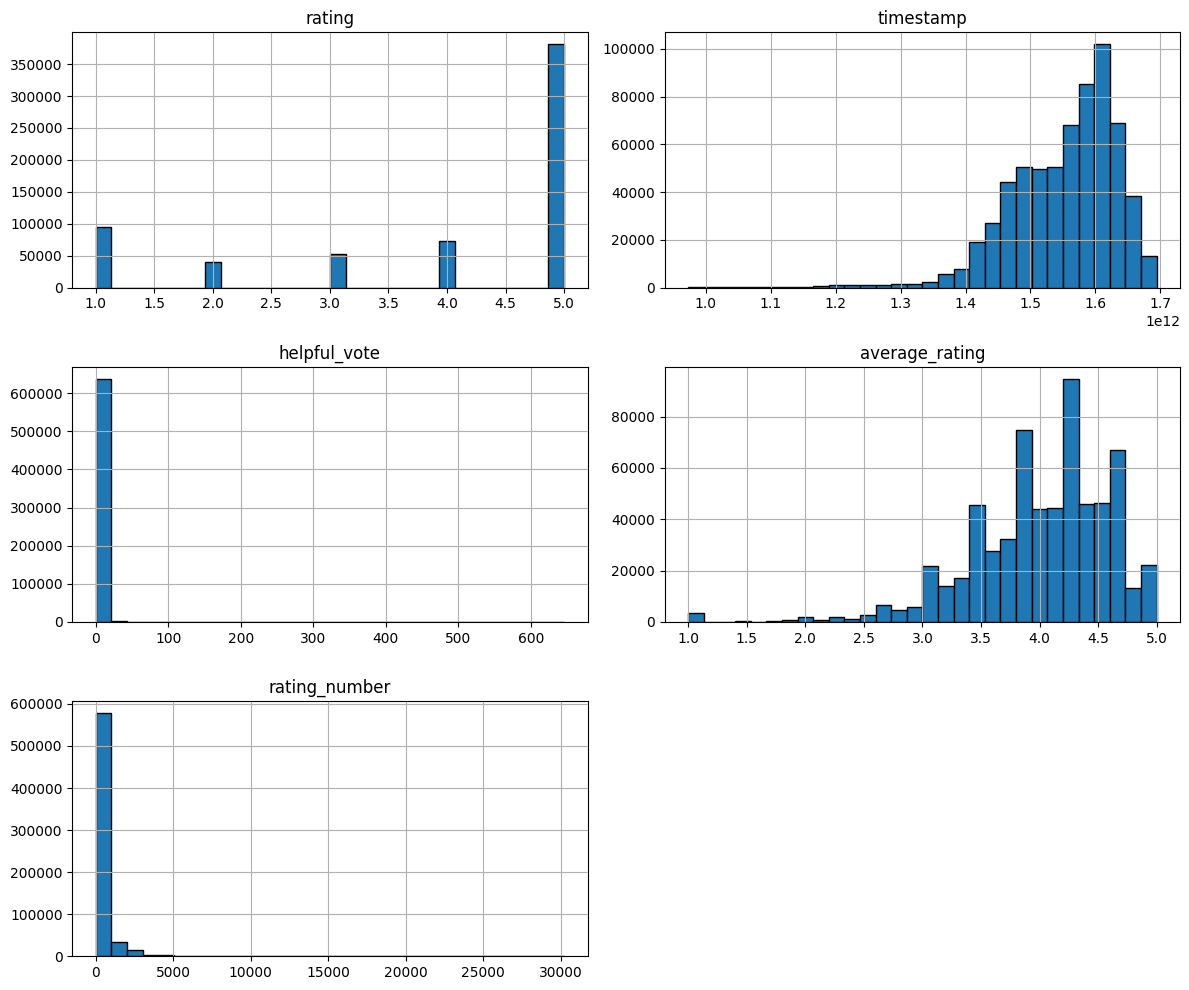

In [17]:
# Plot histograms for numerical features
numerical_features = df_combined.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [18]:
# Plot the distribution of categorical variables
categorical_features = df_combined.select_dtypes(include=[object])

# for column in categorical_features.columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=column, data=df_combined, order=df_combined[column].value_counts().index)
#     plt.title(f'Distribution of {column}')
#     plt.show()


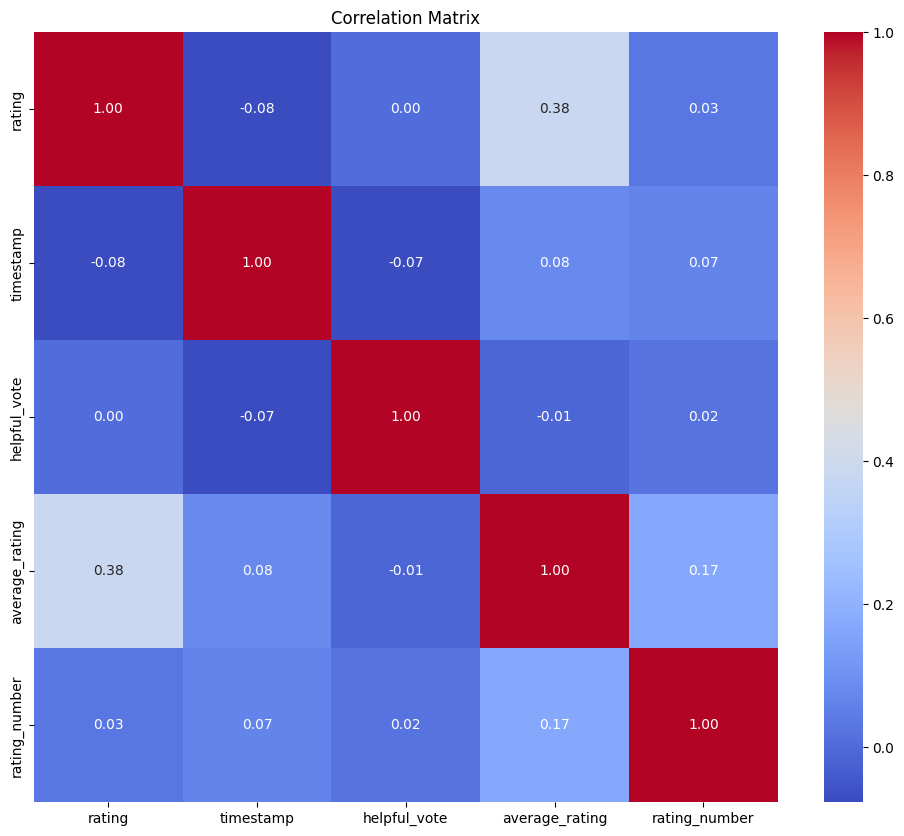

In [19]:
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [20]:
df_combined.columns


Index(['rating', 'text', 'asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'main_category', 'title_y', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'images_y',
       'videos', 'store', 'categories', 'details', 'subtitle'],
      dtype='object')

In [21]:
df_combined['store'].fillna('Unknown', inplace=True)


Filled Null values of store column with Unknown

In [22]:
df_combined['subtitle'].fillna('No Subtitle', inplace=True)


Filled Null values of subtitle column with No Subtitle

In [23]:
# Verify the missing values are handled
print(df_combined.isnull().sum())


rating               0
text                 0
asin                 0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
main_category        0
title_y              0
average_rating       0
rating_number        0
features             0
description          0
price                0
images_y             0
videos               0
store                0
categories           0
details              0
subtitle             0
dtype: int64


#### Null/Missing Values handled

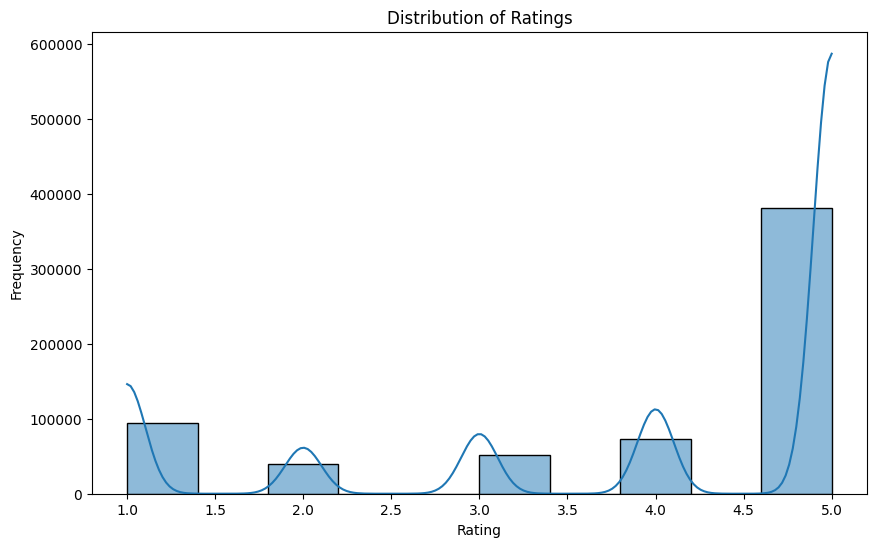

In [24]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


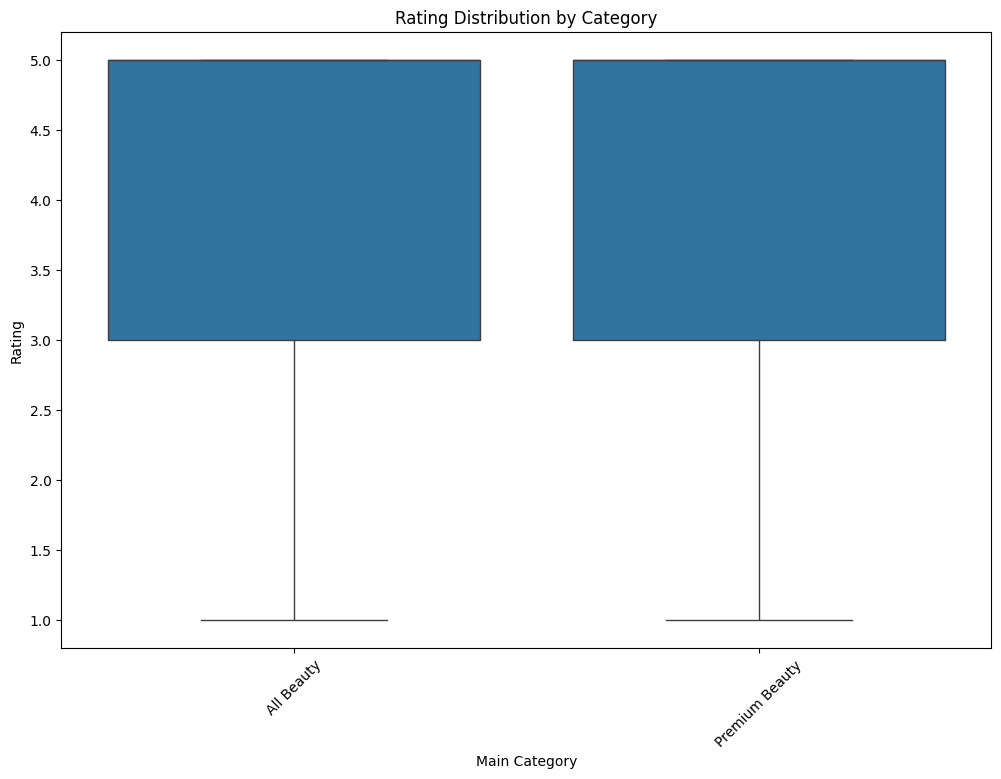

In [25]:
# Visualize ratings across different product categories.
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_category', y='rating', data=df_combined)
plt.title('Rating Distribution by Category')
plt.xlabel('Main Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


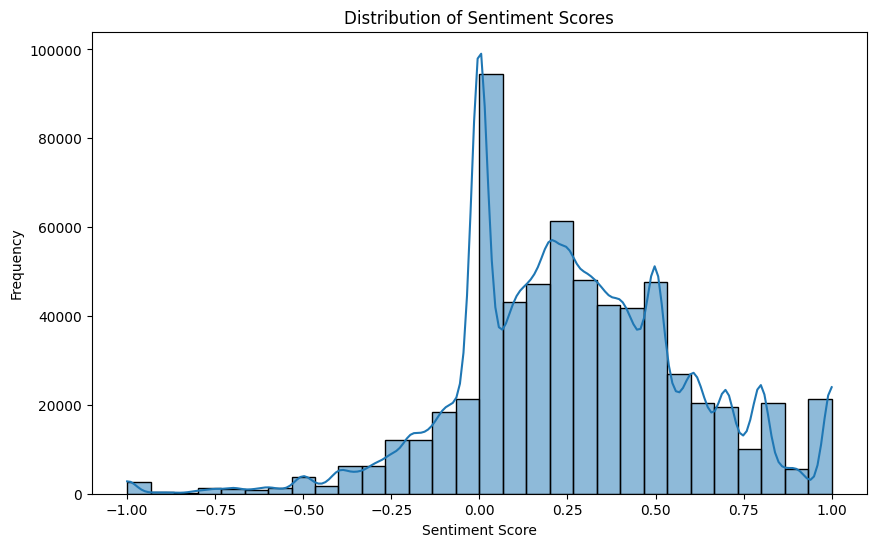

In [26]:
from textblob import TextBlob

# Perform sentiment analysis
df_combined['sentiment'] = df_combined['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [27]:
# from wordcloud import WordCloud

# # Combine all review text
# text = ' '.join(df_combined['text'].dropna())

# # Generate word cloud
# plt.figure(figsize=(12, 8))
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Review Text')
# plt.show()


In [28]:
# Check for duplicate column names
print(df_combined.columns[df_combined.columns.duplicated()])


Index([], dtype='object')


In [29]:
# Check for duplicate index values
duplicate_indices = df_combined.index[df_combined.index.duplicated()]
if len(duplicate_indices) > 0:
    print("Duplicate indices found:", duplicate_indices)
else:
    print("No duplicate indices found.")


No duplicate indices found.


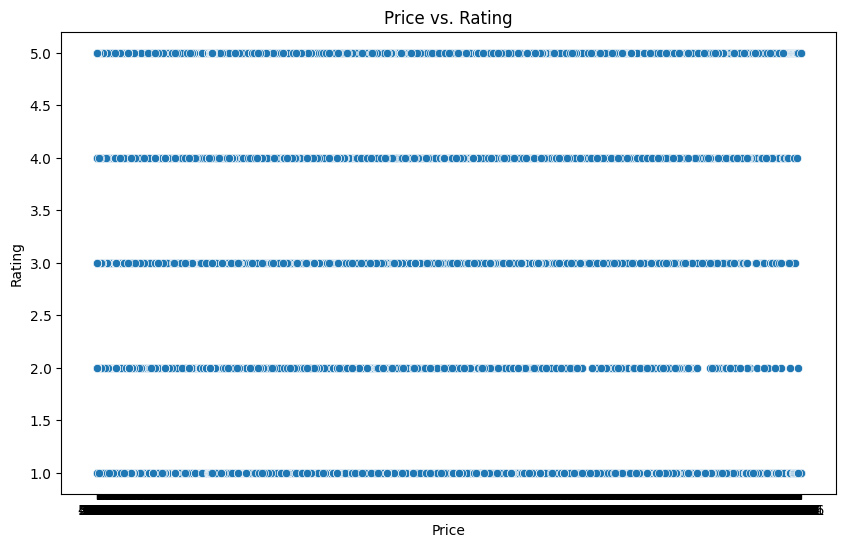

In [30]:
# Scatter plot of Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df_combined)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()



In [31]:
# Find duplicate timestamps
duplicates = df_combined[df_combined.duplicated(subset=['timestamp'], keep=False)]

# Display duplicates for further inspection
print(duplicates[['timestamp', 'rating', 'price']].head())


          timestamp  rating  price
5030  1664796024770     4.0   None
5031  1647259013277     2.0   40.0
5032  1626938293962     3.0   None
5033  1625856750226     4.0  17.71
5034  1601254115091     3.0   None


In [32]:
# Display more duplicate entries for inspection
print(duplicates[['timestamp', 'rating', 'price']].head(20))


          timestamp  rating  price
5030  1664796024770     4.0   None
5031  1647259013277     2.0   40.0
5032  1626938293962     3.0   None
5033  1625856750226     4.0  17.71
5034  1601254115091     3.0   None
5035  1597044203314     3.0   None
5036  1592022918813     4.0   None
5037  1581268579755     4.0   48.0
5038  1546303935540     5.0   None
5039  1507833276095     5.0   None
5085  1606956170871     5.0   9.99
5086  1553620827686     5.0   None
5087  1549735753727     1.0   None
5088  1524701690355     5.0   None
6058  1443218826000     5.0   None
6059  1443218826000     5.0   None
6187  1651870033211     5.0   None
6188  1578348323132     5.0   None
6189  1651870033211     5.0   None
6190  1578348323132     5.0   None


In [33]:
# Remove duplicate timestamps (keeping the first occurrence)
df_combined = df_combined.drop_duplicates(subset=['timestamp'], keep='first')


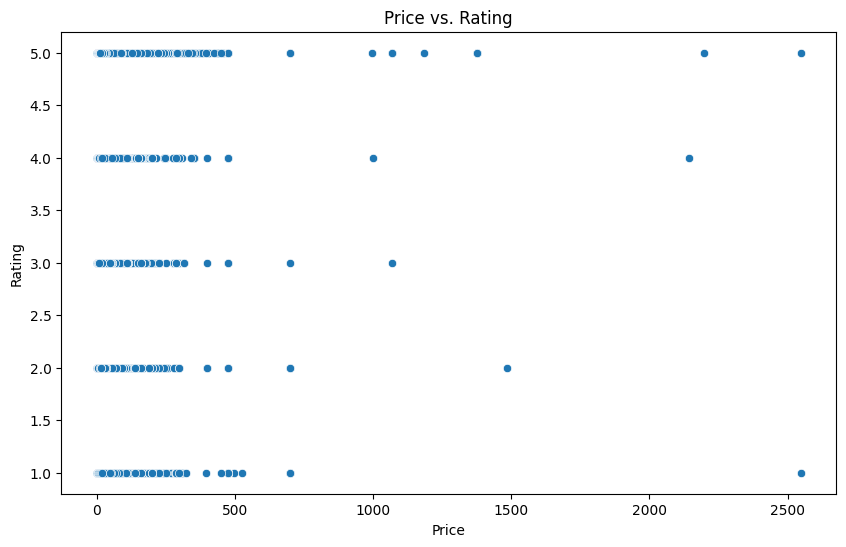

In [34]:
# Convert price to numeric, handling non-numeric values
df_combined['price'] = pd.to_numeric(df_combined['price'].replace('None', np.nan), errors='coerce')

# Scatter plot of Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df_combined)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


In [35]:
# Impute missing values with the mean price
mean_price = df_combined['price'].mean()
df_combined['price'].fillna(mean_price, inplace=True)


In [36]:
# Display summary statistics for the 'price' column
print(df_combined['price'].describe())


count    633489.000000
mean         23.454743
std          14.934122
min           0.010000
25%          23.454743
50%          23.454743
75%          23.454743
max        2548.980000
Name: price, dtype: float64


In [37]:
# Convert price to numeric, handling non-numeric values
df_combined['price'] = pd.to_numeric(df_combined['price'].replace('None', np.nan), errors='coerce')

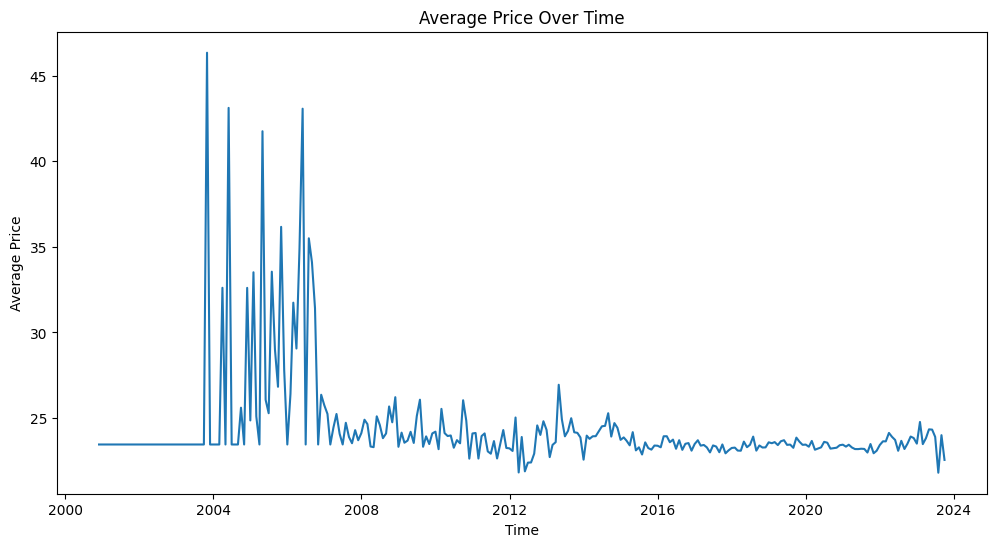

In [38]:
# Convert 'timestamp' to datetime if it's not already
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'], unit='ms')

# Plot average price over time
df_time_trend = df_combined.resample('M', on='timestamp').agg({'price': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='price', data=df_time_trend)
plt.title('Average Price Over Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.show()


In [39]:
# Summary statistics for price by main category
category_stats = df_combined.groupby('main_category')['price'].describe()
print(category_stats)


                   count       mean        std   min        25%        50%  \
main_category                                                                
All Beauty      627759.0  23.337140  14.626322  0.01  23.454743  23.454743   
Premium Beauty    5730.0  36.339004  32.442450  4.95  23.454743  23.454743   

                      75%      max  
main_category                       
All Beauty      23.454743  2548.98  
Premium Beauty  28.000000   395.00  


In [40]:
# Drop any remaining irrelevant columns if needed
df_combined_cleaned = df_combined.drop(columns=['subtitle', 'videos'])

# Verify cleaned DataFrame
print(df_combined_cleaned.head())
# print(df_combined_cleaned.describe())


   rating                                               text        asin  \
0     5.0  This spray is really nice. It smells really go...  B00YQ6X8EO   
1     4.0  This product does what I need it to do, I just...  B081TJ8YS3   
2     1.0                                     Felt synthetic  B09JS339BZ   
3     5.0                                            Love it  B08BZ63GMJ   
4     4.0  The polish was quiet thick and did not apply s...  B00R8DXL44   

                        user_id               timestamp  helpful_vote  \
0  AGKHLEW2SOWHNMFQIJGBECAF7INQ 2020-05-05 14:08:48.923             0   
1  AGKHLEW2SOWHNMFQIJGBECAF7INQ 2020-05-04 18:10:55.070             1   
2  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ 2022-01-28 18:13:50.220             0   
3  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ 2020-12-30 10:02:43.534             0   
4  AGMJ3EMDVL6OWBJF7CA5RGJLXN5A 2020-08-27 22:30:08.138             0   

   verified_purchase main_category  \
0               True    All Beauty   
1               True    All 

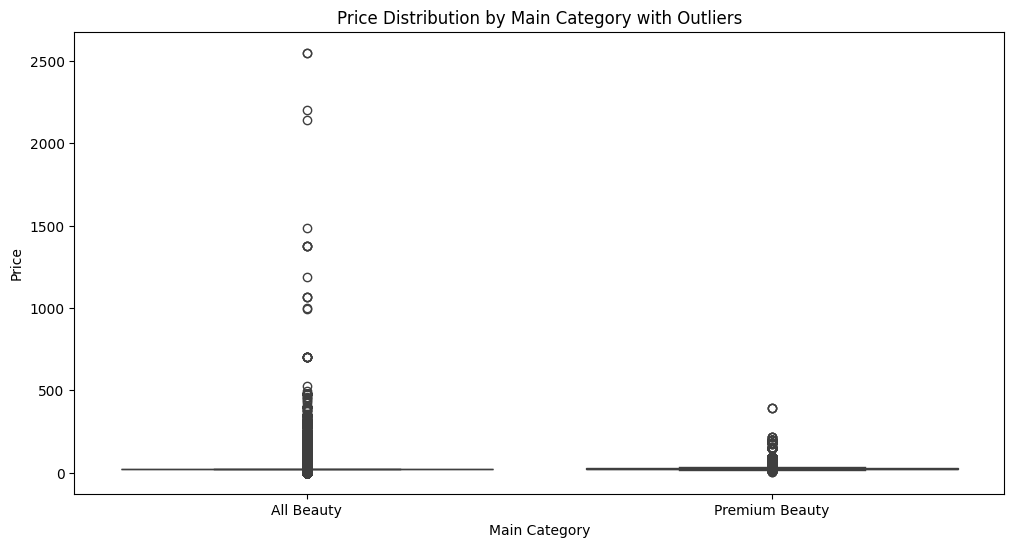

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='price', data=df_combined)
plt.title('Price Distribution by Main Category with Outliers')
plt.xlabel('Main Category')
plt.ylabel('Price')
plt.show()


In [42]:
from scipy.stats import zscore

# Calculate Z-scores
df_combined['price_zscore'] = zscore(df_combined['price'].fillna(df_combined['price'].mean()))

# Identify outliers
outliers = df_combined[df_combined['price_zscore'].abs() > 3]
print(outliers[['price', 'price_zscore']].head())


      price  price_zscore
49    85.00      4.121120
464   78.90      3.712659
471   74.02      3.385890
491   93.00      4.656806
591  109.99      5.794470


In [43]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_combined['price'].quantile(0.25)
Q3 = df_combined['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df_combined[(df_combined['price'] < (Q1 - 1.5 * IQR)) | (df_combined['price'] > (Q3 + 1.5 * IQR))]
print(outliers[['price']].head())


    price
4    7.10
10  49.95
22   7.99
28   9.99
31  57.81


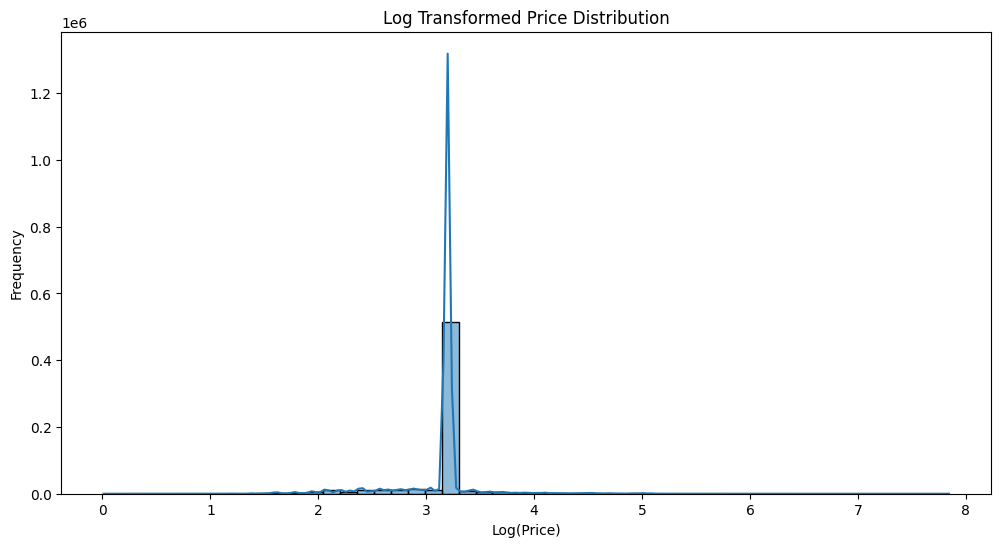

In [44]:
# Apply log transformation to reduce skewness
df_combined['price_log'] = np.log1p(df_combined['price'])

# Visualize transformed data
plt.figure(figsize=(12, 6))
sns.histplot(df_combined['price_log'], bins=50, kde=True)
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


Purpose:

The log transformation is used to stabilize variance and make the distribution of a variable more normal. This is particularly useful if the variable is skewed or has outliers. By applying np.log1p, you are transforming the price values to log(1 + price), which helps in reducing skewness and handling large ranges.

In [45]:
df_combined.describe()

,rating,timestamp,helpful_vote,average_rating,rating_number,price,sentiment,price_zscore,price_log
count,633489.000000,633489,633489.000000,633489.000000,633489.000000,633489.000000,633489.000000,6.334890e+05,633489.000000
mean,3.945627,2019-03-18 10:18:18.992170496,0.887384,3.994628,410.804966,23.454743,0.267010,-6.377582e-16,3.133378
min,1.000000,2000-11-01 04:24:18,0.000000,1.000000,1.000000,0.010000,-1.000000,-1.569879e+00,0.009950
25%,3.000000,2017-07-13 01:21:57.724000,0.000000,3.700000,21.000000,23.454743,0.013333,-7.136777e-16,3.196824
50%,5.000000,2019-09-30 21:07:04.089999872,0.000000,4.100000,80.000000,23.454743,0.250000,-7.136777e-16,3.196824
75%,5.000000,2021-02-14 05:36:08.972999936,1.000000,4.400000,306.000000,23.454743,0.496667,-7.136777e-16,3.196824
max,5.000000,2023-09-09 00:39:36.666000,646.000000,5.000000,30206.000000,2548.980000,1.000000,1.691112e+02,7.843841
std,1.501142,NaN,5.103448,0.600422,1156.328469,14.934122,0.328434,1.000001e+00,0.346748


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS
import string

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Apply preprocessing
df_combined['text_clean'] = df_combined['text'].apply(preprocess_text)

# Split data into positive and negative reviews
positive_reviews = df_combined[df_combined['rating'] >= 4]['text_clean']
negative_reviews = df_combined[df_combined['rating'] <= 2]['text_clean']

# Vectorize once and then transform both positive and negative reviews
vectorizer = CountVectorizer(stop_words='english')  # Adjusted to use 'english' stop words

# Fit the vectorizer on the combined dataset
vectorizer.fit(df_combined['text_clean'])

# Transform positive and negative reviews
positive_word_counts = vectorizer.transform(positive_reviews).sum(axis=0).A1
negative_word_counts = vectorizer.transform(negative_reviews).sum(axis=0).A1

# Create DataFrames for word frequencies
positive_word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': positive_word_counts})
negative_word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': negative_word_counts})

# Display top 20 words for positive reviews
print("Top 20 words in positive reviews:")
print(positive_word_freq.nlargest(20, 'count'))

# Display top 20 words for negative reviews
print("Top 20 words in negative reviews:")
print(negative_word_freq.nlargest(20, 'count'))


Top 20 words in positive reviews:
           word   count
62400      hair  115121
61062     great  111109
79144      love  109056
103304  product   89666
138557      use   78357
77026      like   74529
60039      good   67407
73156      just   52930
119578     skin   50619
107302   really   49564
46440      easy   39926
150626    works   39693
88822      nice   38748
138606     used   37953
77810    little   33368
132469     time   33267
24357        br   32937
138892    using   32471
102634    price   31539
97608   perfect   29251
Top 20 words in negative reviews:
                word  count
62400           hair  36759
77026           like  27342
103304       product  27082
138557           use  17179
73156           just  16583
150430          work  14118
85591          money  13118
42191            did  12254
60039           good  11063
138606          used  10780
44401           dont  10546
44114           does   9938
132469          time   9890
26942            buy   9664
107302  

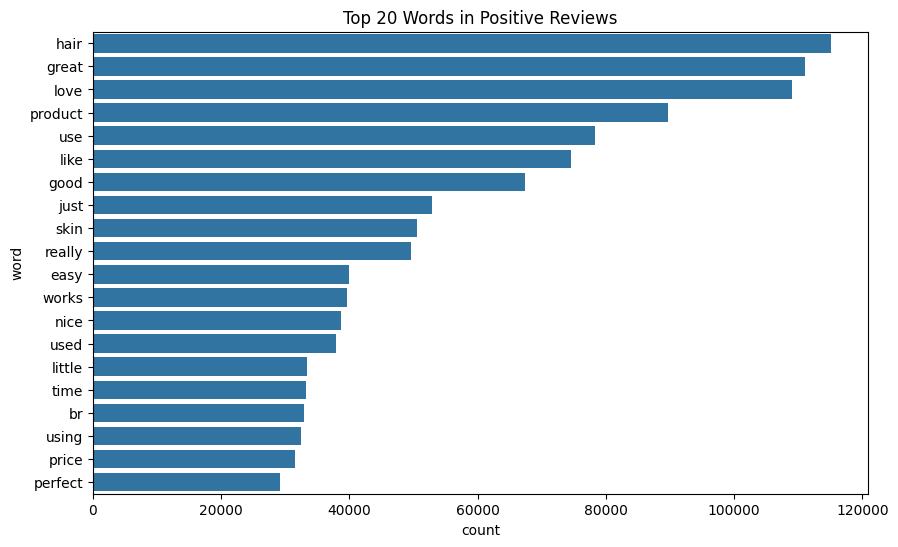

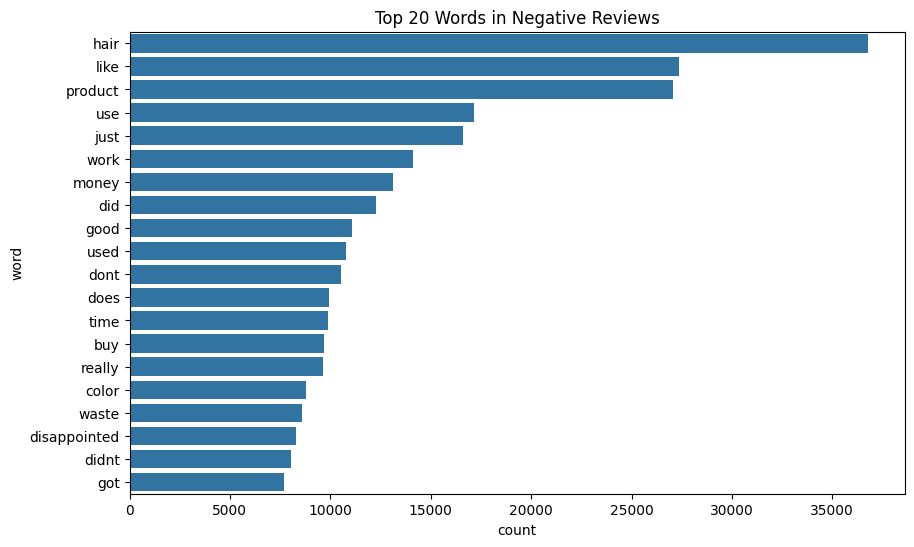

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top 20 words in positive reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=positive_word_freq.nlargest(20, 'count'))
plt.title('Top 20 Words in Positive Reviews')
plt.show()

# Plotting top 20 words in negative reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=negative_word_freq.nlargest(20, 'count'))
plt.title('Top 20 Words in Negative Reviews')
plt.show()


In [49]:
df  = df_combined.copy()

In [50]:
# Convert the 'Date' column to datetime format (assuming you have a date column)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [51]:
# Feature engineering
df['Price_log_Lag1'] = df['price_log'].shift(1)
df['Ratings_Lag1'] = df['average_rating'].shift(1)


### Implementation of Models (Time series models)

In [54]:
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df['price_log'][:train_size], df['price_log'][train_size:]

1. ARIMA and Linear Regression (Hybrid model)

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

In [56]:
# Forecast the future values
forecast = arima_model_fit.forecast(steps=len(test))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Generate forecasts

forecast = arima_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calculate error metrics for ARIMA
mse_arima = mean_squared_error(test, forecast)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test, forecast)
r2_arima = r2_score(test, forecast)

print(f'ARIMA MSE: {mse_arima}')
print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAE: {mae_arima}')
print(f'ARIMA R^2: {r2_arima}')

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA MSE: 0.11559724887661332
ARIMA RMSE: 0.33999595420624246
ARIMA MAE: 0.12479282997928996
ARIMA R^2: -0.02075408317222993


In [59]:
# Prepare data for regression
X = df[['Price_log_Lag1', 'Ratings_Lag1']]
y = df['price_log']

In [60]:
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df['price_log'][:train_size], df['price_log'][train_size:]

In [61]:
# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [62]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = imputer.fit_transform(X_train)


In [63]:
# Drop rows with NaN values in X_train
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]


In [64]:
from sklearn.linear_model import LinearRegression

# Fit Linear Regression model with cleaned data
regression_model = LinearRegression()
regression_model.fit(X_train_imputed, y_train)


LinearRegression()

In [65]:
# Fit Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train_imputed, y_train)

# Make predictions
regression_forecast  = regression_model.predict(X_test)

In [66]:
# Calculate error metrics for Regression
mse_regression = mean_squared_error(y_test, regression_forecast)
rmse_regression = np.sqrt(mse_regression)
mae_arima = mean_absolute_error(y_test, regression_forecast)
r2_arima = r2_score(y_test, regression_forecast)

print(f'Regression MSE: {mse_regression}')
print(f'Regression RMSE: {rmse_regression}')
print(f'Regression MAE: {mae_arima}')
print(f'Regression R^2: {r2_arima}')

Regression MSE: 0.11218876562805014
Regression RMSE: 0.3349459144818013
Regression MAE: 0.16914305118170253
Regression R^2: 0.009343719562752817


### Combine ARIMA with Ratings

To combine the strengths of ARIMA with the additional feature of ratings, you can use a hybrid approach or a more sophisticated model. However, combining ARIMA directly with external regressors can be complex.

In [67]:
# Fill NaN values using forward fill
df[['Ratings_Lag1']] = df[['Ratings_Lag1']].fillna(method='ffill')

# Alternatively, use mean imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Ratings_Lag1']] = imputer.fit_transform(df[['Ratings_Lag1']])


In [68]:
# Replace inf with NaN
df[['Ratings_Lag1']] = df[['Ratings_Lag1']].replace([np.inf, -np.inf], np.nan)

# Fill NaN values using forward fill
df[['Ratings_Lag1']] = df[['Ratings_Lag1']].fillna(method='ffill')


In [84]:
df[['Ratings_Lag1']][train_size:].shape


(126698, 1)

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the train and test sizes if not already defined
train_size = len(train)

# Fit SARIMAX model with exogenous variables
sarimax_model = SARIMAX(train, order=(5, 1, 0), exog=df[['Ratings_Lag1']][:train_size])
sarimax_model_fit = sarimax_model.fit()

# Forecast with exogenous variables
forecast_sarimax = sarimax_model_fit.get_forecast(steps=len(test), exog=df[['Ratings_Lag1']][train_size:]).predicted_mean




c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

In [90]:
# Calculate error metrics for SARIMAX
mse_sarimax = mean_squared_error(test, forecast_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax)
mae_arima = mean_absolute_error(test, forecast_sarimax)
r2_arima = r2_score(test, forecast_sarimax)


print(f'SARIMAX MSE: {mse_sarimax}')
print(f'SARIMAX RMSE: {rmse_sarimax}')
print(f'SARIMAX MAE: {mae_arima}')
print(f'SARIMAX R^2: {r2_arima}')

SARIMAX MSE: 0.11559729209498047
SARIMAX RMSE: 0.3399960177634151
SARIMAX MAE: 0.12479200575822759
SARIMAX R^2: -0.02075446480176857


Interpretation of the Metrics:

MSE and RMSE measure the average squared error and the square root of the average squared error, respectively. Lower values indicate better model performance. An RMSE of 0.34 suggests that the model's predictions are, on average, off by about 0.34 units from the actual values.

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s less sensitive to outliers compared to MSE. Your MAE of 0.125 means that, on average, the model’s predictions are off by 0.125 units.

R² indicates how well the model’s predictions match the actual data. An R² of -0.0208 suggests that the model does not explain much of the variance in the data and performs worse than a naive model that predicts the mean of the target variable. In practice, this negative value often indicates that the model is underfitting the data or that there may be a mismatch between the model and the data characteristics.

Next 5 Years Forecast

In [91]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Define the date range for future forecasts
future_dates = pd.date_range(start='2025-01-01', end='2030-12-31', freq='D')

# Fit ARIMAX model
model_arimax = ARIMA(df['price_log'], exog=df['Ratings_Lag1'], order=(1,1,1))
results_arimax = model_arimax.fit()

# Prepare future exogenous data (using historical values or assumptions)
future_exog = pd.DataFrame(index=future_dates, data={'Ratings_Lag1': df['Ratings_Lag1'].mean()})  


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

In [92]:
# Forecast
forecast_arimax = results_arimax.predict(start=len(df), end=len(df) + len(future_dates) - 1, exog=future_exog)

# Combine with future dates
forecast_arimax_series = pd.Series(forecast_arimax, index=future_dates)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Let's try other models for checking the performance 

2. Exponential Smoothing model

In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and test sets
train, test = df['price_log'][:train_size], df['price_log'][train_size:]

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)  # Adjust parameters as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [94]:
# Evaluate model
ets_mse = mean_squared_error(test, forecast)
ets_rmse = mean_squared_error(test, forecast, squared=False)
ets_mae = mean_absolute_error(test, forecast)
ets_r2 = r2_score(test, forecast)

print(f"ETS MSE: {ets_mse}")
print(f"ETS RMSE: {ets_rmse}")
print(f"ETS MAE: {ets_mae}")
print(f"ETS R^2: {ets_r2}")

ETS MSE: 0.11331087440487743
ETS RMSE: 0.33661680648012426
ETS MAE: 0.15495102946248734
ETS R^2: -0.0005647957941519177


In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
model_ets = ExponentialSmoothing(df['price_log'], trend='add', seasonal='add', seasonal_periods=365)
results_ets = model_ets.fit()

# Forecast
forecast_ets = results_ets.forecast(steps=len(future_dates))

# Combine with future dates
forecast_ets_series = pd.Series(forecast_ets, index=future_dates)


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4. LSTM Model

In [96]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['price_log'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 12
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1), return_sequences=True))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Forecast
y_pred = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 141s 9ms/step - loss: 0.0025
Epoch 2/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 146s 9ms/step - loss: 0.0020
Epoch 3/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - loss: 0.0020
Epoch 4/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 157s 10ms/step - loss: 0.0020
Epoch 5/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 145s 9ms/step - loss: 0.0020
Epoch 6/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - loss: 0.0019
Epoch 7/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 131s 8ms/step - loss: 0.0019
Epoch 8/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 129s 8ms/step - loss: 0.0019
Epoch 9/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 127s 8ms/step - loss: 0.0019
Epoch 10/10
15837/15837 ━━━━━━━━━━━━━━━━━━━━ 129s 8ms/step - loss: 0.0019
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


In [97]:
# Evaluate model
lstm_mse = mean_squared_error(y_test, y_pred)
lstm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lstm_mae = mean_absolute_error(y_test, y_pred)
lstm_r2 = r2_score(y_test, y_pred)

print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM R^2: {lstm_r2}")

LSTM MSE: 0.1070931546403951
LSTM RMSE: 0.32725090472051427
LSTM MAE: 0.17524780053938016
LSTM R^2: 0.054313516835240105


In [98]:
# Forecast
def forecast_lstm(model, data, look_back, n_steps):
    forecast = []
    input_seq = data[-look_back:]
    for _ in range(n_steps):
        prediction = model.predict(input_seq.reshape(1, look_back, 1))
        forecast.append(prediction[0, 0])
        input_seq = np.append(input_seq[1:], prediction[0, 0])
    return np.array(forecast)

In [99]:
#  Define the number of steps to forecast (e.g., 5 years of daily data)
n_steps = 5 * 365  # 5 years

In [101]:

# Generate future dates
future_dates = pd.date_range(start='2025-01-01', end='2030-12-31', freq='D')

In [ ]:

# Generate forecasts
forecast_scaled = forecast_lstm(model_lstm, scaled_data, look_back, len(future_dates))

In [ ]:
# Truncate future dates to match forecast length
future_dates = future_dates[:len(forecast_scaled)]

In [106]:
# Truncate future dates to match forecast length
future_dates = future_dates[:len(forecast_scaled)]

# Generate forecasts
forecast_scaled = forecast_lstm(model_lstm, scaled_data, look_back, len(future_dates))

# Inverse transform the forecasts
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [107]:
# Combine with future dates
forecast_series = pd.Series(forecast.flatten(), index=future_dates)

print(forecast_series.head())

2025-01-01    3.125124
2025-01-02    3.122119
2025-01-03    3.119054
2025-01-04    3.117556
2025-01-05    3.117081
Freq: D, dtype: float32


In [108]:
# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': ['SARIMAX', 'ETS', 'LSTM'],
    'MSE': [mse_sarimax, ets_mse, lstm_mse],
    'RMSE': [rmse_sarimax, ets_rmse, lstm_rmse],
    'MAE': [mae_arima, ets_mae, lstm_mae],
    'R^2': [r2_arima, ets_r2, lstm_r2]
})

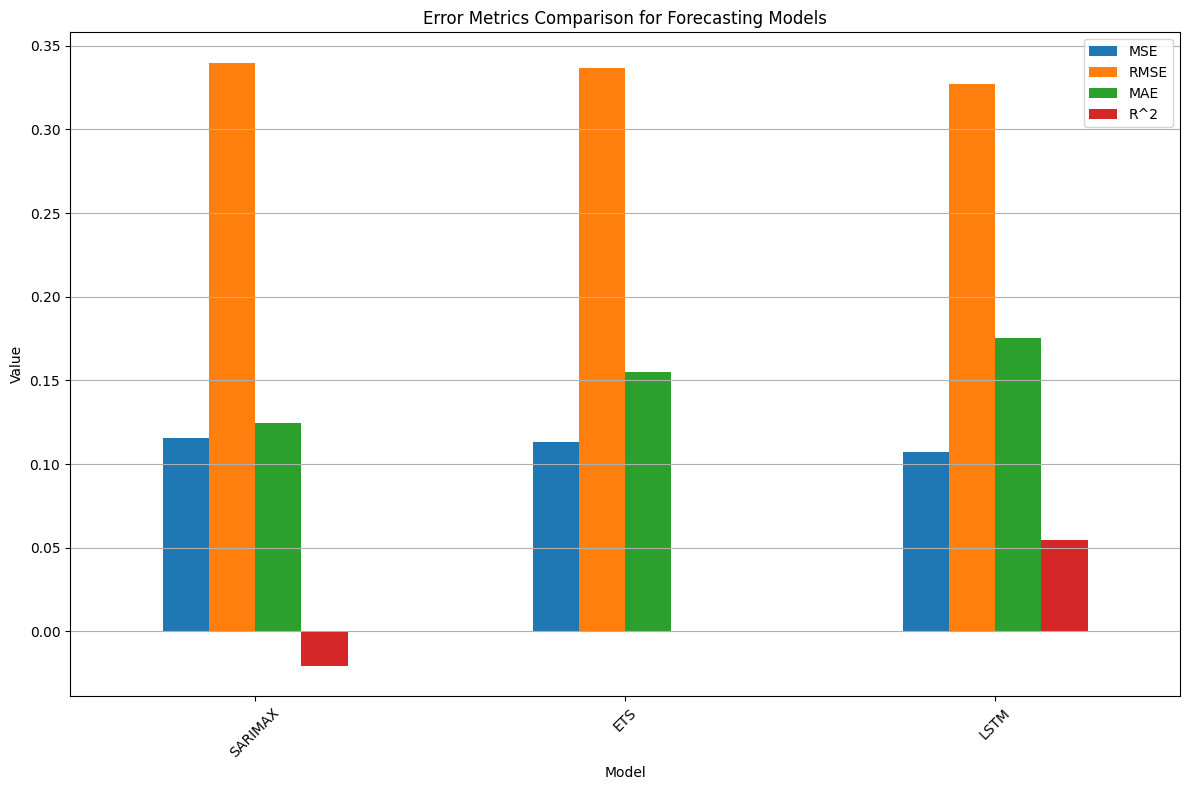

In [109]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
metrics_df.plot(x='Model', kind='bar', ax=ax, legend=True)
plt.title('Error Metrics Comparison for Forecasting Models')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()